In [126]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<br><br>
<font size='6'><b>Unsupervised Learning : K-means Clustering and PCA</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 20%>
        by Haedong Jeong<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>


Table of Contents
<div id="toc"></div>

# 1. K-means Clustering

<font size='4'>Unsupervised Learning</font>

- Data clustering is an unsupervised learning problem

- Given: 
 - $m$ unlabeled examples $\{x^{(1)},x^{(2)}\cdots, x^{(m)}\}$
 - the number of partitions $k$


- Goal: group the examples into $k$ partitions

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
            <img src="./image_files/kmeanex.bmp", width = 400>
        </td>
        <td width = 48%>
            $$\{x^{(1)},x^{(2)},\cdots,x^{(m)}\} \quad \Rightarrow \quad \text{Clustering}$$
        </td>
    </tr>
</table>

- the only information clustering uses is the similarity between examples

- clustering groups examples based of their mutual similarities

- A good clustering is one that achieves:
    - high within-cluster similarity
    - low inter-cluster similarity


## 1.1. (Iterative) Algorithm

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy import stats, misc

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

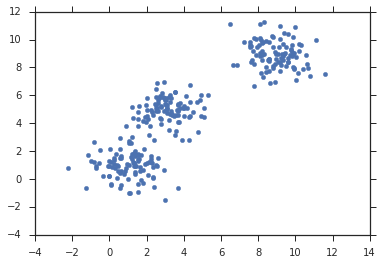

In [102]:
group1 = np.random.multivariate_normal(np.array([1, 1]), np.eye(2), 100) 
group2 = np.random.multivariate_normal(np.array([3, 5]), np.eye(2), 100) 
group3 = np.random.multivariate_normal(np.array([9, 9]), np.eye(2), 100)

data = np.concatenate((group1, group2, group3), 0).transpose()

plt.scatter(data[0, :], data[1, :], color = 'b')
plt.show()

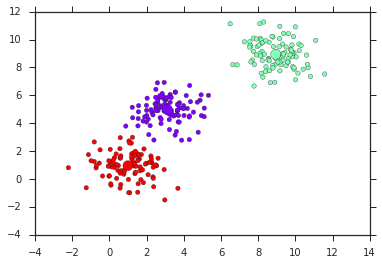

In [103]:
# number of cluster and data
    
ncluster = 3
ndata = 300

#randomly initialize 100 times

C = np.zeros((100, ))
MU = np.zeros((100, ))

for i in range(0,100):
    #select random index
    r = ndata * np.random.rand(3,1)
    r = r.astype(int)[:,0]
    
    mu = data[:, r]
    
    pre_mu = mu
    #run k - means
    for run in range(0,50):
        #cluster assignment
        distance = np.zeros((ncluster, ndata))
        for k in range(0, ncluster):
            distance[k, :] = np.sum((data - np.array([mu[:, k]]).transpose())**2, axis = 0)
                
        c = distance.argmin(axis = 0)
        # move centroid 
       
        for k in range(0, ncluster):
            mu[:, k] = np.mean(data[:, c == k], axis = 1)
            

        if np.sum(np.abs(pre_mu - mu)) < 10 **(-5):
            break;
        else:
            pre_mu = mu
    #compute cost
    cost = 0
    for j in range(0, ncluster):
        cost = cost + np.sum((data[:, c == j] - np.array([mu[:, j]]).transpose())**2)
    
    # find minumun cost and corresponding mu and c
    if i == 0:
        C = c
        J = cost
        MU = mu
    elif cost < J:
        J = cost
        C = c
        MU = mu

plt.scatter(data[0, :], data[1, :], c = C, cmap = 'rainbow')
plt.scatter(MU[0, :], MU[1, :], marker = 'o', s=100, c = np.arange(ncluster), cmap = 'rainbow')        
plt.show()

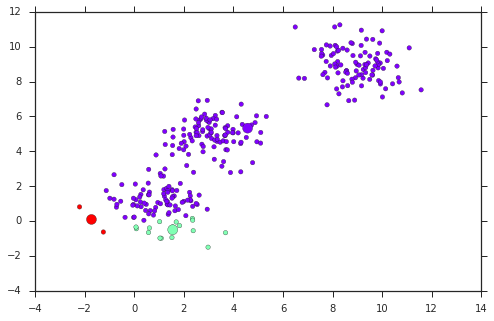

In [104]:
def kmeans_step(frame = 0, ncluster = 3 ):   
    
    ndata = 300

    #select random index
    rng = np.random.RandomState(2)
    center = rng.randn(2, ncluster)
    c = np.zeros(ndata)
    nstep = frame
    for i in range(nstep+1):
        #cluster assignment
        old_center = center

        distance = np.zeros((ncluster, ndata))
        for k in range(0, ncluster):
            distance[k, :] = np.sum((data - np.array([center[:, k]]).transpose())**2, axis = 0)

        c = distance.argmin(axis = 0)
        # move centroid 

        for k in range(0, ncluster):
            center[:, k] = np.mean(data[:, c == k], axis = 1)
        
        nan = np.isnan(center)
        center[nan] = old_center[nan]

    plt.figure(figsize=(8,5))
    plt.scatter(data[0, :], data[1, :], c = c, cmap = 'rainbow')
    plt.scatter(center[0, :], center[1, :], marker = 'o', s=100, c = np.arange(ncluster), cmap = 'rainbow')
    plt.xlim(-4, 14)
    
from IPython.html.widgets import interact
interact(kmeans_step, frame=[0, 10], ncluster = [1, 6])

## 1.3. Python code

__Data Load__

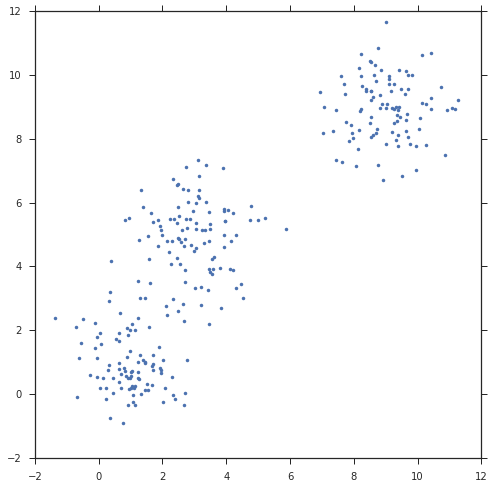

In [105]:
import matplotlib.pyplot as plt
from six.moves import cPickle

X = cPickle.load(open('./data_files/kmeans_example.pkl','rb'))

plt.figure(figsize=(8,8))
plt.plot(X[:,0],X[:,1],'b.')
plt.axis('equal')
plt.show()

__K-means clustering__

In [106]:
from sklearn.cluster import KMeans

In [107]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)

In [108]:
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


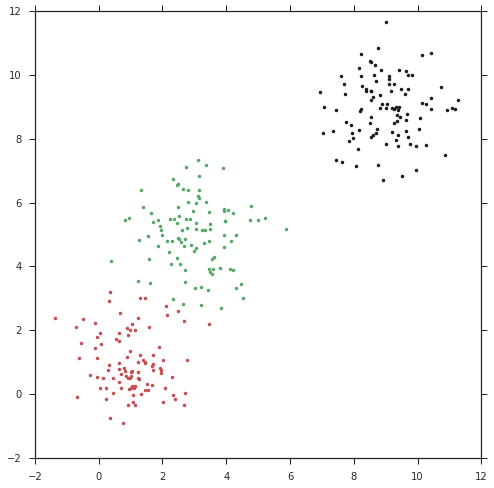

In [109]:
plt.figure(figsize=(8,8))
plt.hold(True)

plt.plot(X[kmeans.labels_ == 0,0],X[kmeans.labels_ == 0,1],'g.')
plt.plot(X[kmeans.labels_ == 1,0],X[kmeans.labels_ == 1,1],'k.')
plt.plot(X[kmeans.labels_ == 2,0],X[kmeans.labels_ == 2,1],'r.')


plt.axis('equal')
plt.show()

## 1.4. Choosing the Number of Clusters

- Idea: when adding another cluster does not give much better modeling of the data

- One way to select $k$ for the K-means algorithm is to try different values of $k$, plot the K-means objective versus $k$, and look at the '<font color='green'>elbow-point</font>' in the plot

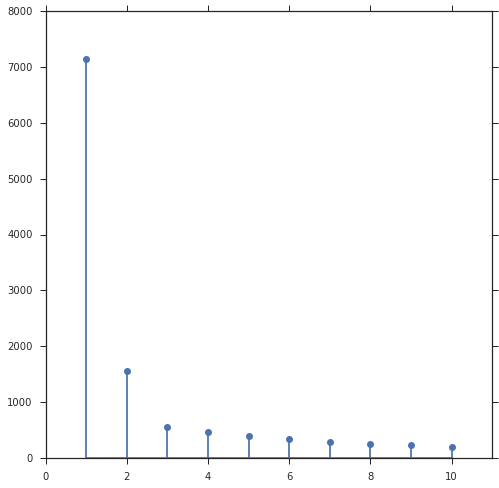

In [110]:
cost = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    cost.append(abs(kmeans.score(X)))

plt.figure(figsize=(8,8))
plt.stem(range(1,11),cost)
plt.xlim([0, 11])
plt.show()

## 1.5. K-means: Limitations

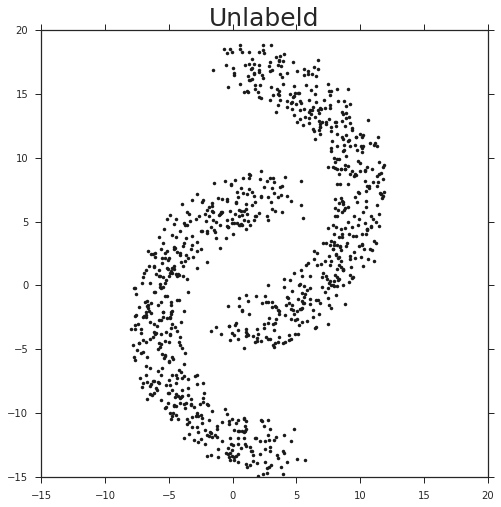

In [111]:
from six.moves import cPickle
X = cPickle.load(open('./data_files/kmeans_lim.pkl','rb'))

plt.figure(figsize=(8,8))
plt.axis('equal')
plt.plot(X[:,0], X[:,1],'k.')
plt.title('Unlabeld', fontsize='25')
plt.show()

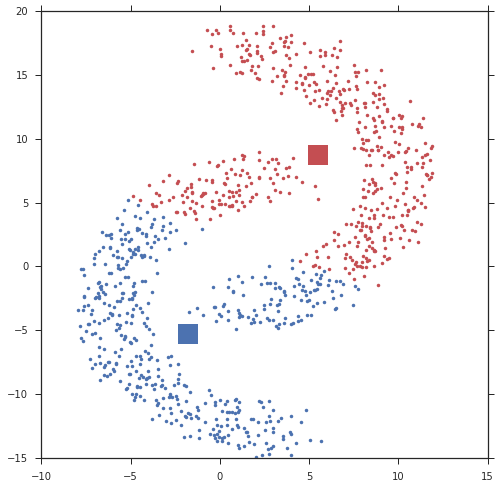

In [112]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

plt.figure(figsize=(8,8))
plt.hold(True)

plt.plot(X[kmeans.labels_ == 0,0],X[kmeans.labels_ == 0,1],'r.')
plt.plot(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1],'rs',markersize=20)

plt.plot(X[kmeans.labels_ == 1,0],X[kmeans.labels_ == 1,1],'b.')
plt.plot(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1],'bs',markersize=20)
plt.show()

# 2. Correlation Analysis

- Statistical relationship between two sets of data
- http://rpsychologist.com/d3/correlation/

<img src="./image_files/correlation1.png", width = 1000>

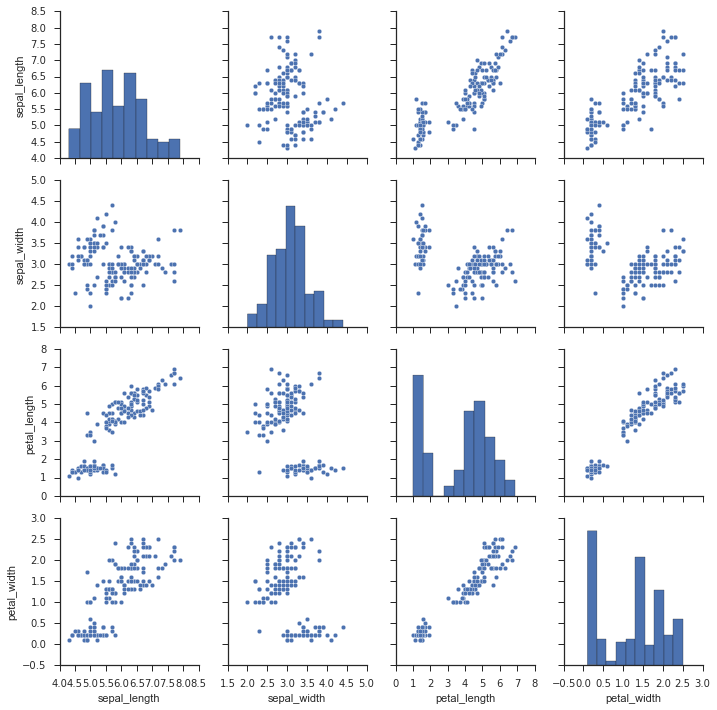

In [113]:
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")

g = sns.pairplot(iris)
sns.plt.show()

# 3. Principal Component Analysis (PCA)

<br>
<font size='4'><b>Motivation: Can we describe high-dimensional data in a "simpler" way?</b></font> <br><br>
$\qquad \rightarrow$ Dimension reduction without losing too much information <br>
$\qquad \rightarrow$ Find a low-dimensional, yet useful representation of the data

## 3.1. Dimension Reduction method ($n \rightarrow k$)

1. Choose top $k$ (orthonormal) eigenvectors, $U = [u_1, u_2, \cdots, u_k]$
    
2. Project $x_i$ onto span $\{ u_1, u_2, \cdots, u_k\}$
    

$$z^{(i)} = \begin{bmatrix} 
u_1^Tx^{(i)}\\
u_2^Tx^{(i)}\\
\vdots \\
u_k^Tx^{(i)}\\
\end{bmatrix} \;\text{ or }\; z = U^{T}x
$$

- Pictorial summary of PCA
<br>
<img src="./image_files/summary2.png", width = 800>
<br>

$\qquad \qquad \qquad x^{(i)} \rightarrow$ projection onto unit vector $u \implies u^Tx^{(i)} = $ distance from the origin along $u$

## 3.2. Python code

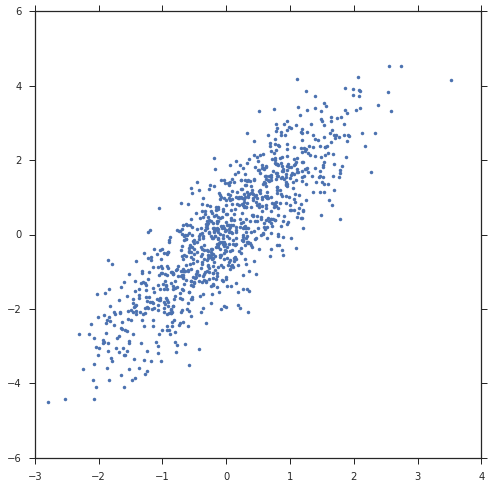

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle
%matplotlib inline

X = cPickle.load(open('./data_files/pca_example.pkl','rb'))
plt.figure(figsize=(8, 8))
plt.plot(X[:, 0], X[:, 1],'b.')
plt.show()

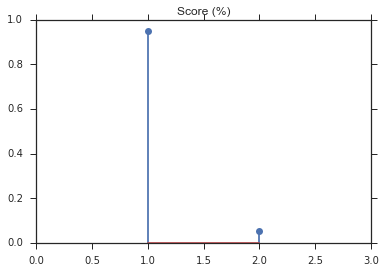

In [115]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca.fit(X)

plt.figure()
plt.stem(range(1,3), pca.explained_variance_ratio_)
plt.xlim([0, 3])
plt.ylim([0, 1])
plt.title('Score (%)')
plt.show()

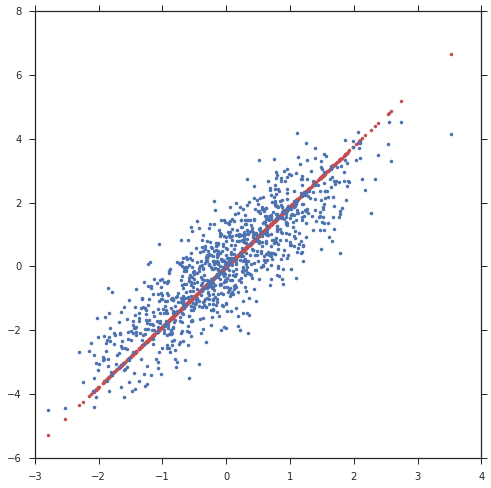

In [116]:
# Nomalization and calculate gradient
u1 = principal_axis[:,0]/(np.linalg.norm(principal_axis)) 
h = u1[1]/u1[0]

plt.figure(figsize=(8, 8))
plt.hold(True)
plt.plot(x,x.dot(h),'r.')
plt.plot(X[:, 0], X[:, 1],'b.')
plt.show()

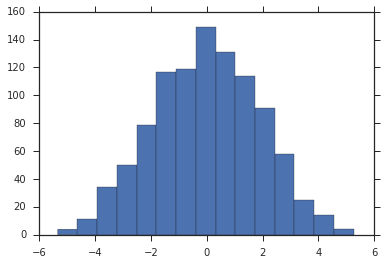

In [117]:
pca = PCA(n_components=1)
pca.fit(X)
reduced_coordinate = pca.fit_transform(X)
plt.hist(reduced_coordinate, 15)
plt.show()

## 3.3 Example

- multiple video camera records of spring and mass system

<img src="./image_files/senses.png", width = 700>

In [118]:
%%html
<iframe 
width="560" height="315" src="https://www.youtube.com/embed/Pkit-64g0eU" frameborder="0" allowfullscreen>
</iframe>

In [119]:
%%html
<iframe 
width="560" height="315" src="https://www.youtube.com/embed/x4lvjVjUUqg" frameborder="0" allowfullscreen>
</iframe>

In [120]:
%%html
<iframe 
width="560" height="315" src="https://www.youtube.com/embed/2t62WkNIqxY" frameborder="0" allowfullscreen>
</iframe>

$$ 
x^{(i)} = \begin{bmatrix} x \text{ in camera 1} \\ y \text{ in camera 1} \\x \text{ in camera 2}\\y \text{ in camera 2}\\x \text{ in camera 3}\\y \text{ in camera 3} \end{bmatrix},\qquad X = \begin{bmatrix} \vdots & \vdots & & \vdots\\
(x^{(1)}) & (x^{(2)}) & \cdots & (x^{(m)})\\
\vdots & \vdots & & \vdots\\
\end{bmatrix}
$$

### 3.3.1. Data Load

In [121]:
from six.moves import cPickle

cPickle.load(open('./data_files/pca_spring.pkl','rb'))

print(position.shape)

(6, 273)


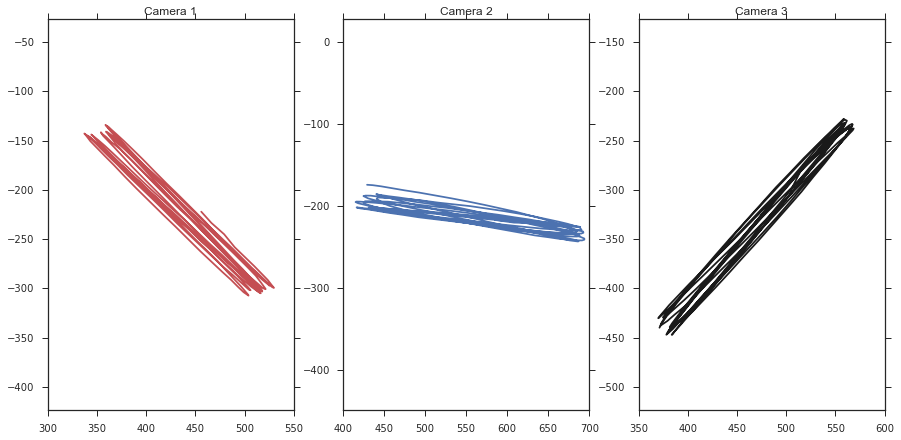

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.plot(position[0, :], -position[1, :],'r')
plt.xlim([300, 600])
plt.ylim([100, 500])
plt.axis('equal')
plt.title('Camera 1')

plt.subplot(132)
plt.plot(position[2, :], -position[3, :],'b')
plt.xlim([300, 600])
plt.ylim([100, 500])
plt.axis('equal')
plt.title('Camera 2')

plt.subplot(133)
plt.plot(position[4, :], -position[5, :],'k')
plt.xlim([300, 600])
plt.ylim([100, 500])
plt.axis('equal')
plt.title('Camera 3')

plt.show()

### 3.3.2. PCA

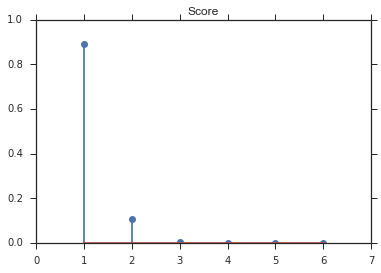

In [123]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(position)


plt.figure()
plt.stem(range(1,7), pca.explained_variance_ratio_)
plt.xlim([0, 7])
plt.ylim([0, 1])
plt.title('Score')
plt.show()


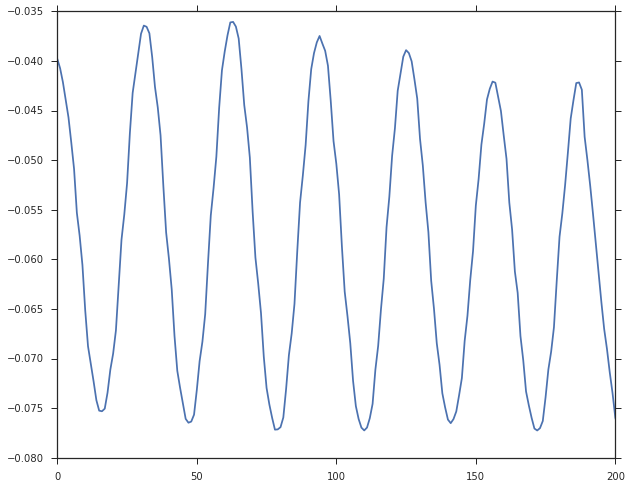

In [124]:
principal = pca.components_
plt.figure(figsize=(10,8))
plt.plot(principal[0,:])
plt.xlim([0,200])
plt.show()

Reference: John P Cunningham & Byron M Yu, <a href="./reference_files/nn.3776.pdf" target="_blank">Dimensionality reduction for large-scale neural recordings</a>, Nature Neuroscience 17, 1500–1509 (2014)

<img src="./image_files/pca_timeseries.png", width = 750>